#Prepare Enviornment & Import Customized Python Module

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
cd /content/drive/MyDrive/Carol_Copy/PointingShortcutting/DesktopVersion

/content/drive/MyDrive/Carol_Copy/PointingShortcutting/DesktopVersion


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from desktop_py_module import WayFindingTrajectory
from desktop_py_module import WayFindingAnalyzer
from desktop_py_module import Pointing

# Processing Pointing Data

In [19]:
data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/DesktopVersion/Pointing-PhaseI"
pp1 = Pointing('desktop_point_trial_info.csv',data_path)
pp1.read_pointing_data()
pp1.join_trial_info()
pp1.save("ProcessedData/pointingPhase1.csv")

In [20]:
data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/DesktopVersion/Pointing-PhaseII"
pp2 = Pointing('desktop_point_trial_info.csv',data_path)
pp2.read_pointing_data()
pp2.join_trial_info()
pp2.save("ProcessedData/pointingPhase2.csv")

# Processing Shortcutting Data

In [ ]:
data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/DesktopVersion/Shortcutting"
trajectory = WayFindingTrajectory('desktop_shortcut_trial_info.csv',data_path)
trajectory.read_shortcutting_data()
trajectory.save_raw("ProcessedData/raw_trajectory.csv")
trajectory.clean_up_trajectory()
trajectory.save_processed("ProcessedData/processed_trajectory.csv")
analyzer = WayFindingAnalyzer("ProcessedData/processed_trajectory.csv")
analyzer.analyze()
analyzer.save("ProcessedData/analyzed_trajectory.csv")

# Check & Plot Trajectories

In [ ]:
traj_post = pd.read_csv("ProcessedData/processed_trajectory.csv")
strategy = pd.read_csv("strategy.csv")
wftrajc = pd.read_csv("ProcessedData/analyzed_trajectory.csv")
performance = wftrajc.merge(strategy, how = 'left', on=['Subject','Order'])

def get_sample(performance,trial,target):
  sample = performance[(performance['TrialID_x']==trial)&(performance.human_coding == target)][['Subject','grid_distance','human_distance']]
  return sample

In [ ]:
traj_post.head()

,Subject,Order,TrialID,Time,X,Z,X_d,Z_d
0,605,13,2,2.0,173.5239,171.2283,174,173
1,605,13,2,2.0,164.4490,171.6187,154,173
2,605,13,2,3.0,155.9386,172.2133,154,173
3,605,13,2,3.0,144.0192,171.7310,134,173
4,605,13,2,4.0,139.9825,168.1941,134,173


In [ ]:
performance.human_coding.unique()

array(['shortcut', 'shortcut liberal', 'uncodable', 'reverse learned',
       'learned liberal', 'learned', 'reversed learned', 'Failure',
       'rev learned liberal', 'rev learned'], dtype=object)

In [ ]:
sample_results = get_sample(performance,24,'shortcut').sort_values(by=['human_distance','grid_distance','Subject'])
sample_results

,Subject,grid_distance,human_distance
299,619,183.0,133.39
979,658,183.0,138.30
479,629,183.0,138.83
19,605,183.0,145.18
99,609,183.0,145.82
1099,666,183.0,157.54
119,610,183.0,162.85
839,648,263.0,203.81
879,650,305.0,226.72


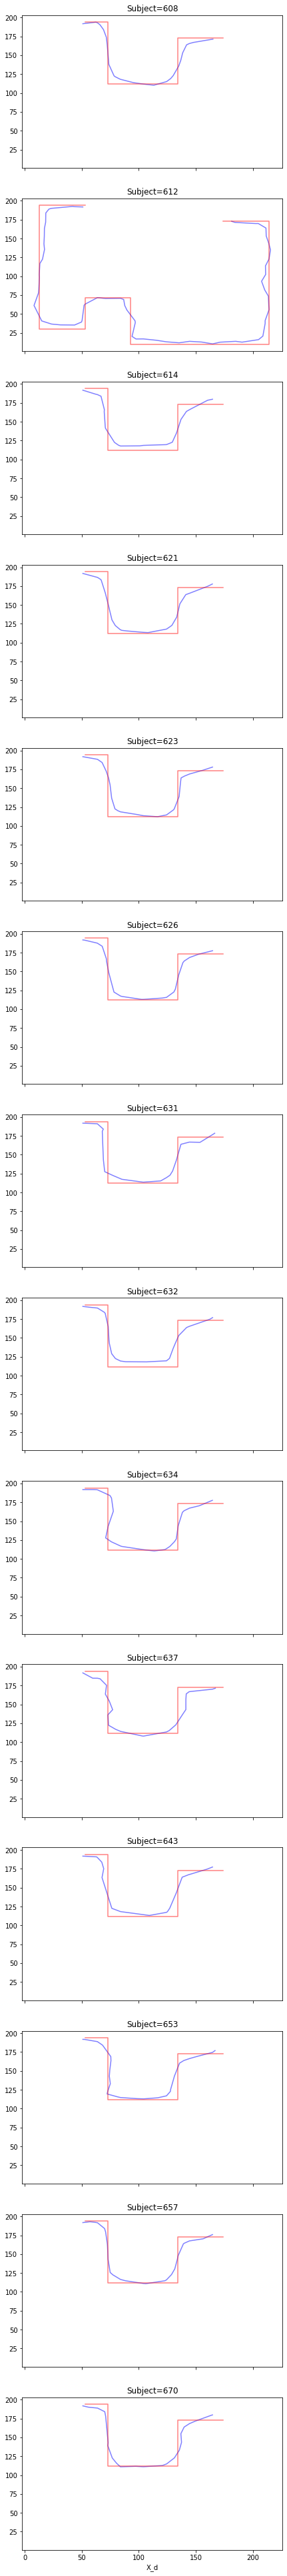

In [ ]:
plotnum = sample_results.Subject.nunique()
grouped = traj_post[(traj_post.TrialID ==18) & (traj_post.Subject.isin(sample_results.Subject.to_list()))].groupby('Subject')
fig, axs = plt.subplots(plotnum,figsize=(7,5*plotnum),sharex=True, sharey=True)
i=0
for key, gp in grouped:
  gp.plot(ax=axs[i],x='X',y='Z',color ='blue',alpha = 0.5)
  gp.plot(ax=axs[i],x='X_d',y='Z_d',color ='red',alpha = 0.5)
  axs[i].set_title('Subject=%s'%key)
  axs[i].get_legend().remove()
  i=i+1
plt.show()

In [ ]:
# int(len(traj_post[(traj_post.TrialID ==17) & (traj_post.Subject==620)])/4)
traj_post[(traj_post.TrialID ==24) & (traj_post.Subject==609)]

,Subject,gender,Order,TrialID,Time,X,Z,Orientation,X_d,Z_d
3217,609,0,9,24,0.0,131.5000,152.10000,272.0,134.0,153.0
3218,609,0,9,24,1.0,131.5000,152.10000,272.0,134.0,153.0
3219,609,0,9,24,2.0,132.2924,145.70660,172.2,134.0,153.0
3220,609,0,9,24,2.0,132.6585,143.03460,172.2,134.0,132.0
3221,609,0,9,24,3.0,135.0744,127.69020,162.1,134.0,132.0
3222,609,0,9,24,3.0,137.6957,122.68670,146.0,134.0,112.0
3223,609,0,9,24,4.0,144.1264,112.54200,149.9,134.0,112.0
3224,609,0,9,24,4.0,144.2770,112.28230,149.9,154.0,112.0
3225,609,0,9,24,4.0,150.1671,102.20960,166.1,154.0,92.0
3226,609,0,9,24,5.0,151.4960,96.06019,167.4,154.0,92.0


In [ ]:
traj_post[(traj_post.TrialID ==3) & (traj_post.Subject==649)]

,Subject,gender,Order,TrialID,Time,X,Z,Orientation,X_d,Z_d
32166,649,1,16,3,0.0,216.10000,132.1000,271.0000,214.0,132.0
32167,649,1,16,3,1.0,216.10000,132.1000,271.0000,214.0,132.0
32168,649,1,16,3,2.0,216.10000,132.1000,271.0000,214.0,132.0
32169,649,1,16,3,3.0,215.63570,136.7242,354.2000,214.0,132.0
32170,649,1,16,3,3.0,214.89970,143.2865,353.2000,214.0,153.0
32171,649,1,16,3,4.0,212.09440,153.9302,333.7000,214.0,153.0
32172,649,1,16,3,4.0,205.86560,163.7003,295.2000,214.0,173.0
32173,649,1,16,3,4.0,204.71980,164.5386,290.1000,194.0,173.0
32174,649,1,16,3,5.0,201.52570,165.1042,271.9000,194.0,173.0
32175,649,1,16,3,5.0,184.42950,164.7836,271.3000,174.0,173.0
